# Clustering by K Means
[Wine Quality Data Set](https://archive.ics.uci.edu/ml/datasets/wine+quality) 

Input variables (based on physicochemical tests): 

| Attribute            | Description |
| :---                 | :---        |
| fixed acidity        | most acids involved with wine or fixed or nonvolatile (do not evaporate readily) |
| volatile acidity     | the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste |
| citric acid          | found in small quantities, citric acid can add 'freshness' and flavor to wines |
| residual sugar       | the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet  |
| chlorides            | the amount of salt in the wine|
| free sulfur dioxide  | the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine |
| total sulfur dioxide | amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine |
| density              | the density of water is close to that of water depending on the percent alcohol and sugar content |
| pH                   | describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale |
| sulphates            | a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant |
| alcohol              | the percent alcohol content of the wine |
| quality              | Output variable (based on sensory data), (score between 0 and 10) |

### Problem
     Will apply K Means clustering for data points where quality in (4,7)
     
### Notes

### References
   1. [Clustering](https://scikit-learn.org/stable/modules/clustering.html)

In [1]:
import numpy as np
import pandas as pd
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Clustering algorithms
from sklearn.cluster import KMeans

%matplotlib inline

In [2]:
data = pd.read_csv('./data/winequality-red.csv',sep=';')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

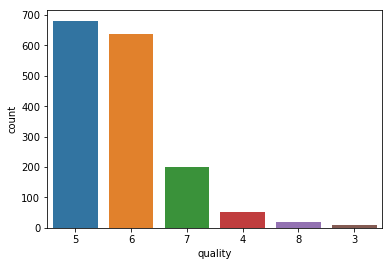

In [7]:
sns.countplot(data.quality,order=data['quality'].value_counts().index)

In [8]:
data_47 = data[(data['quality']==4) | (data['quality']==7) ]

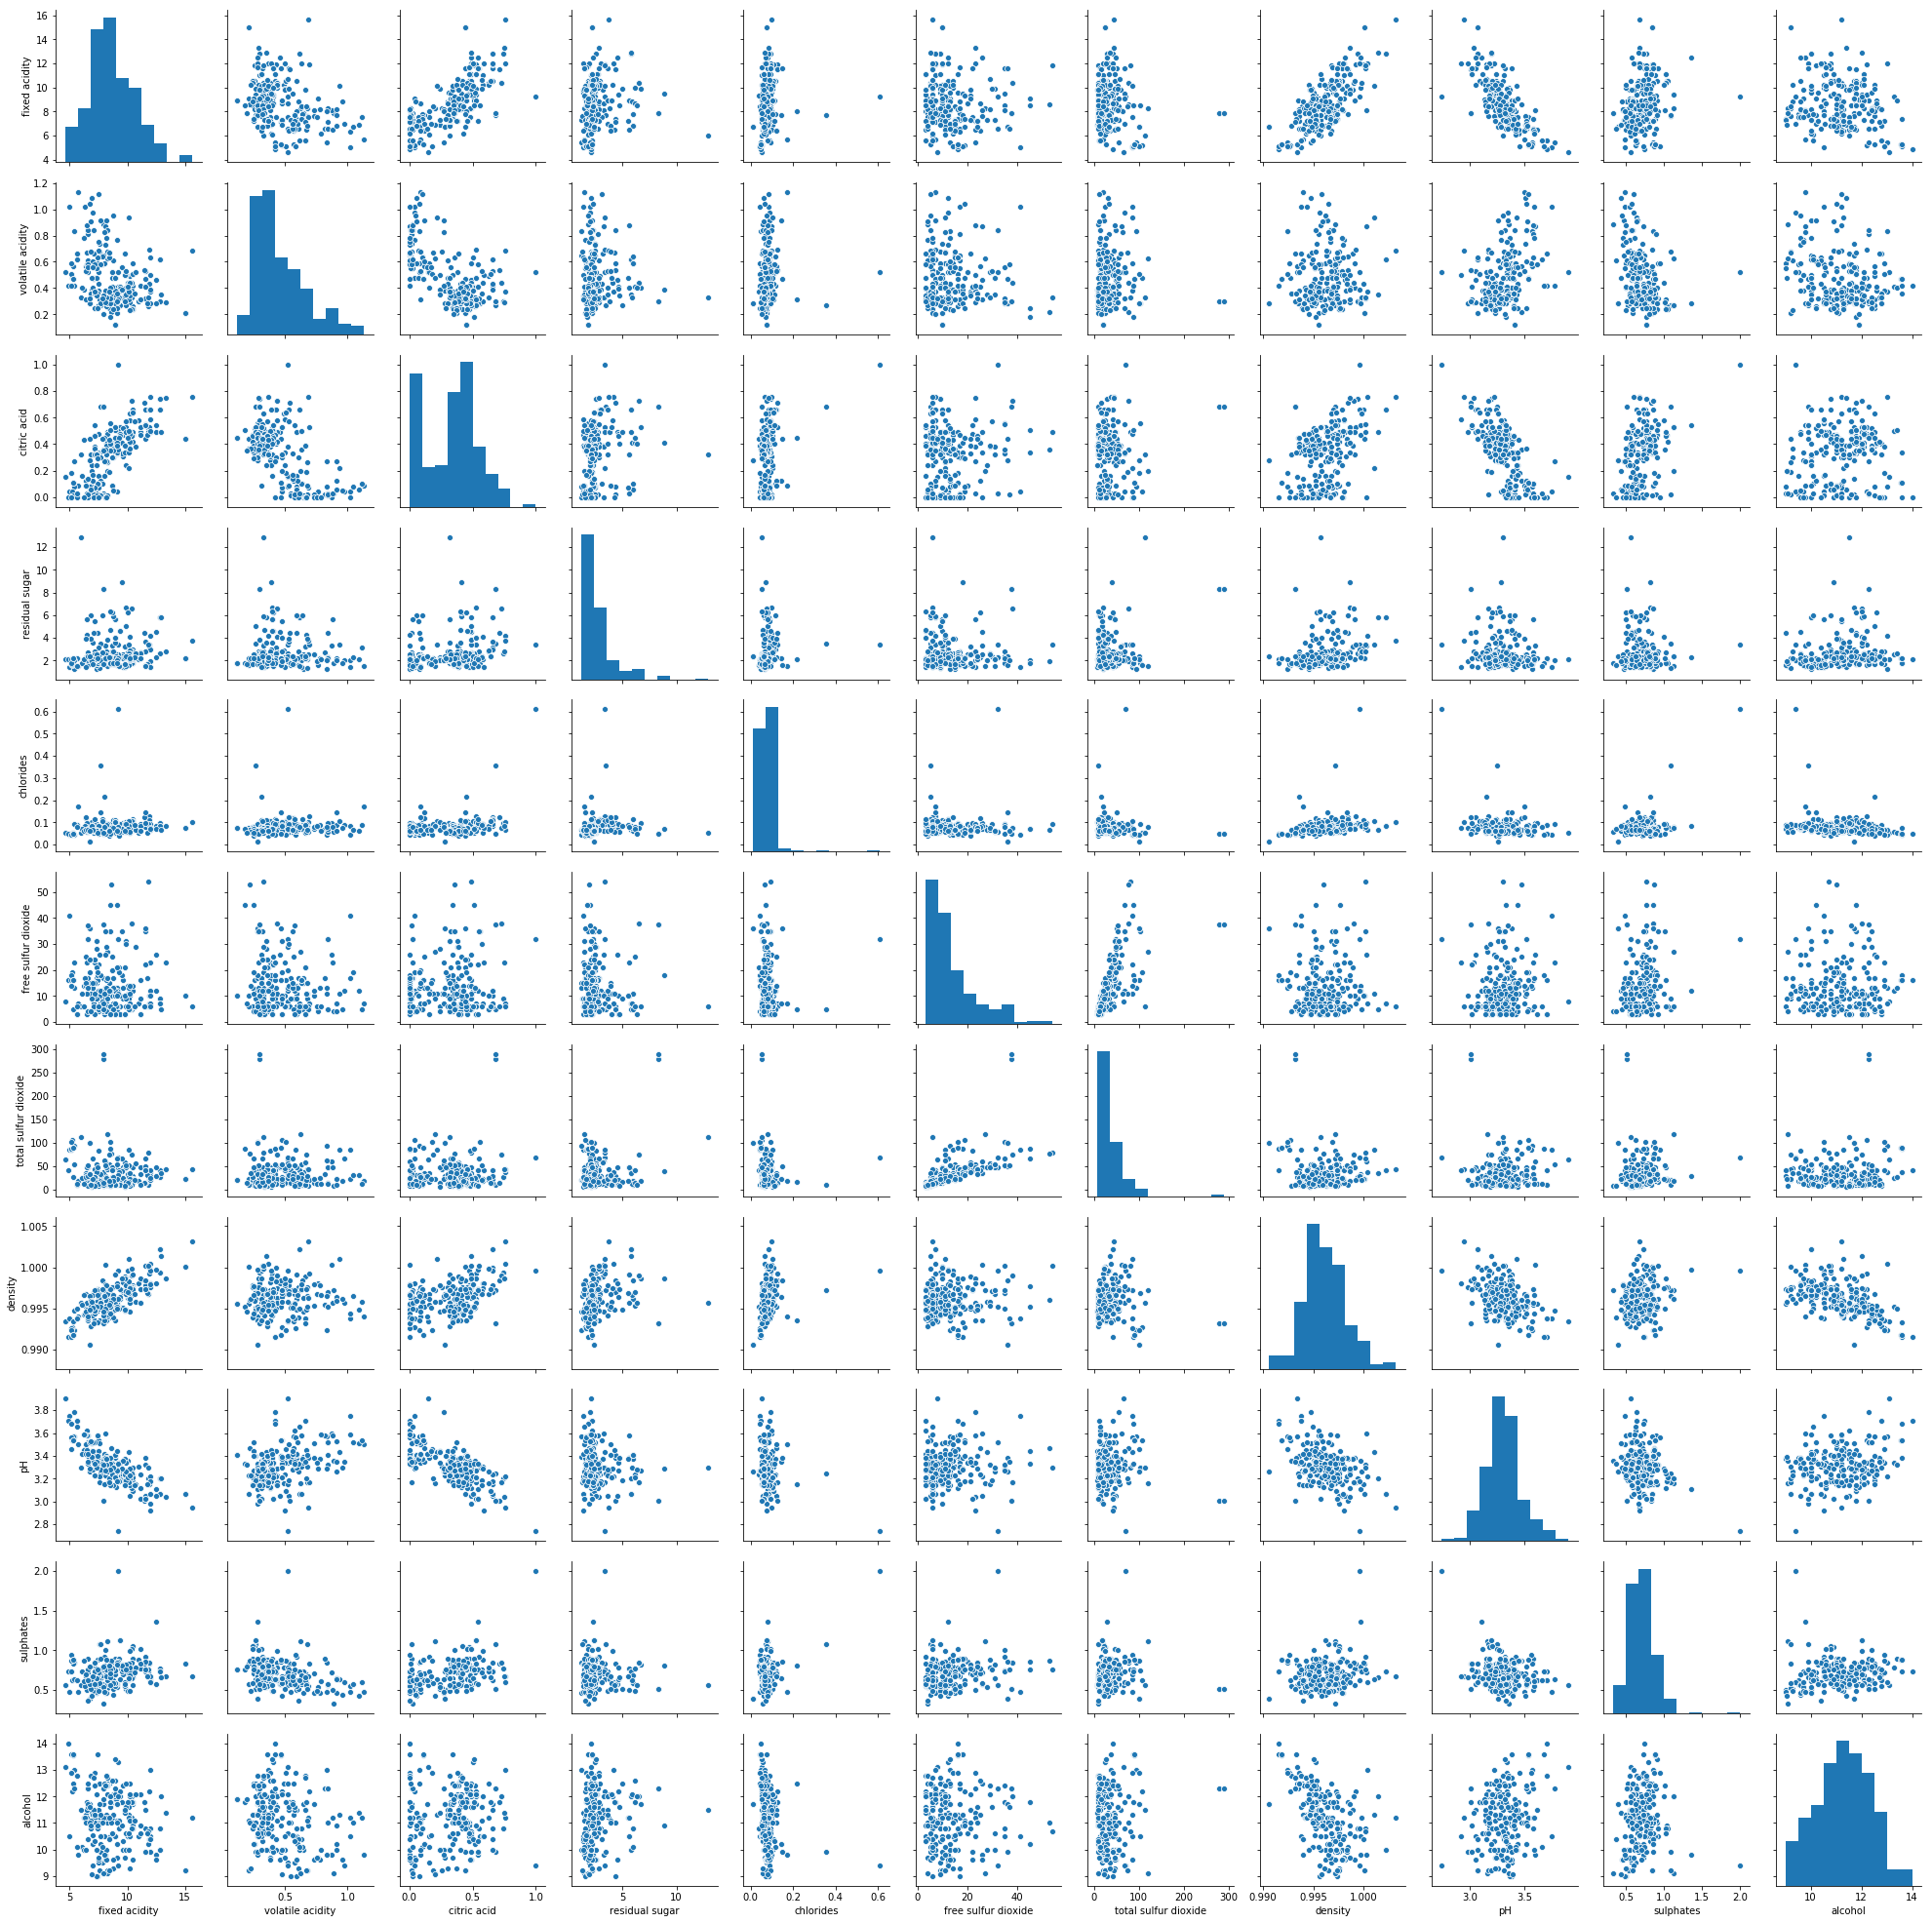

In [9]:
sns.pairplot(data_47.drop('quality',axis=1))

In [10]:
data_47.columns[:11]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

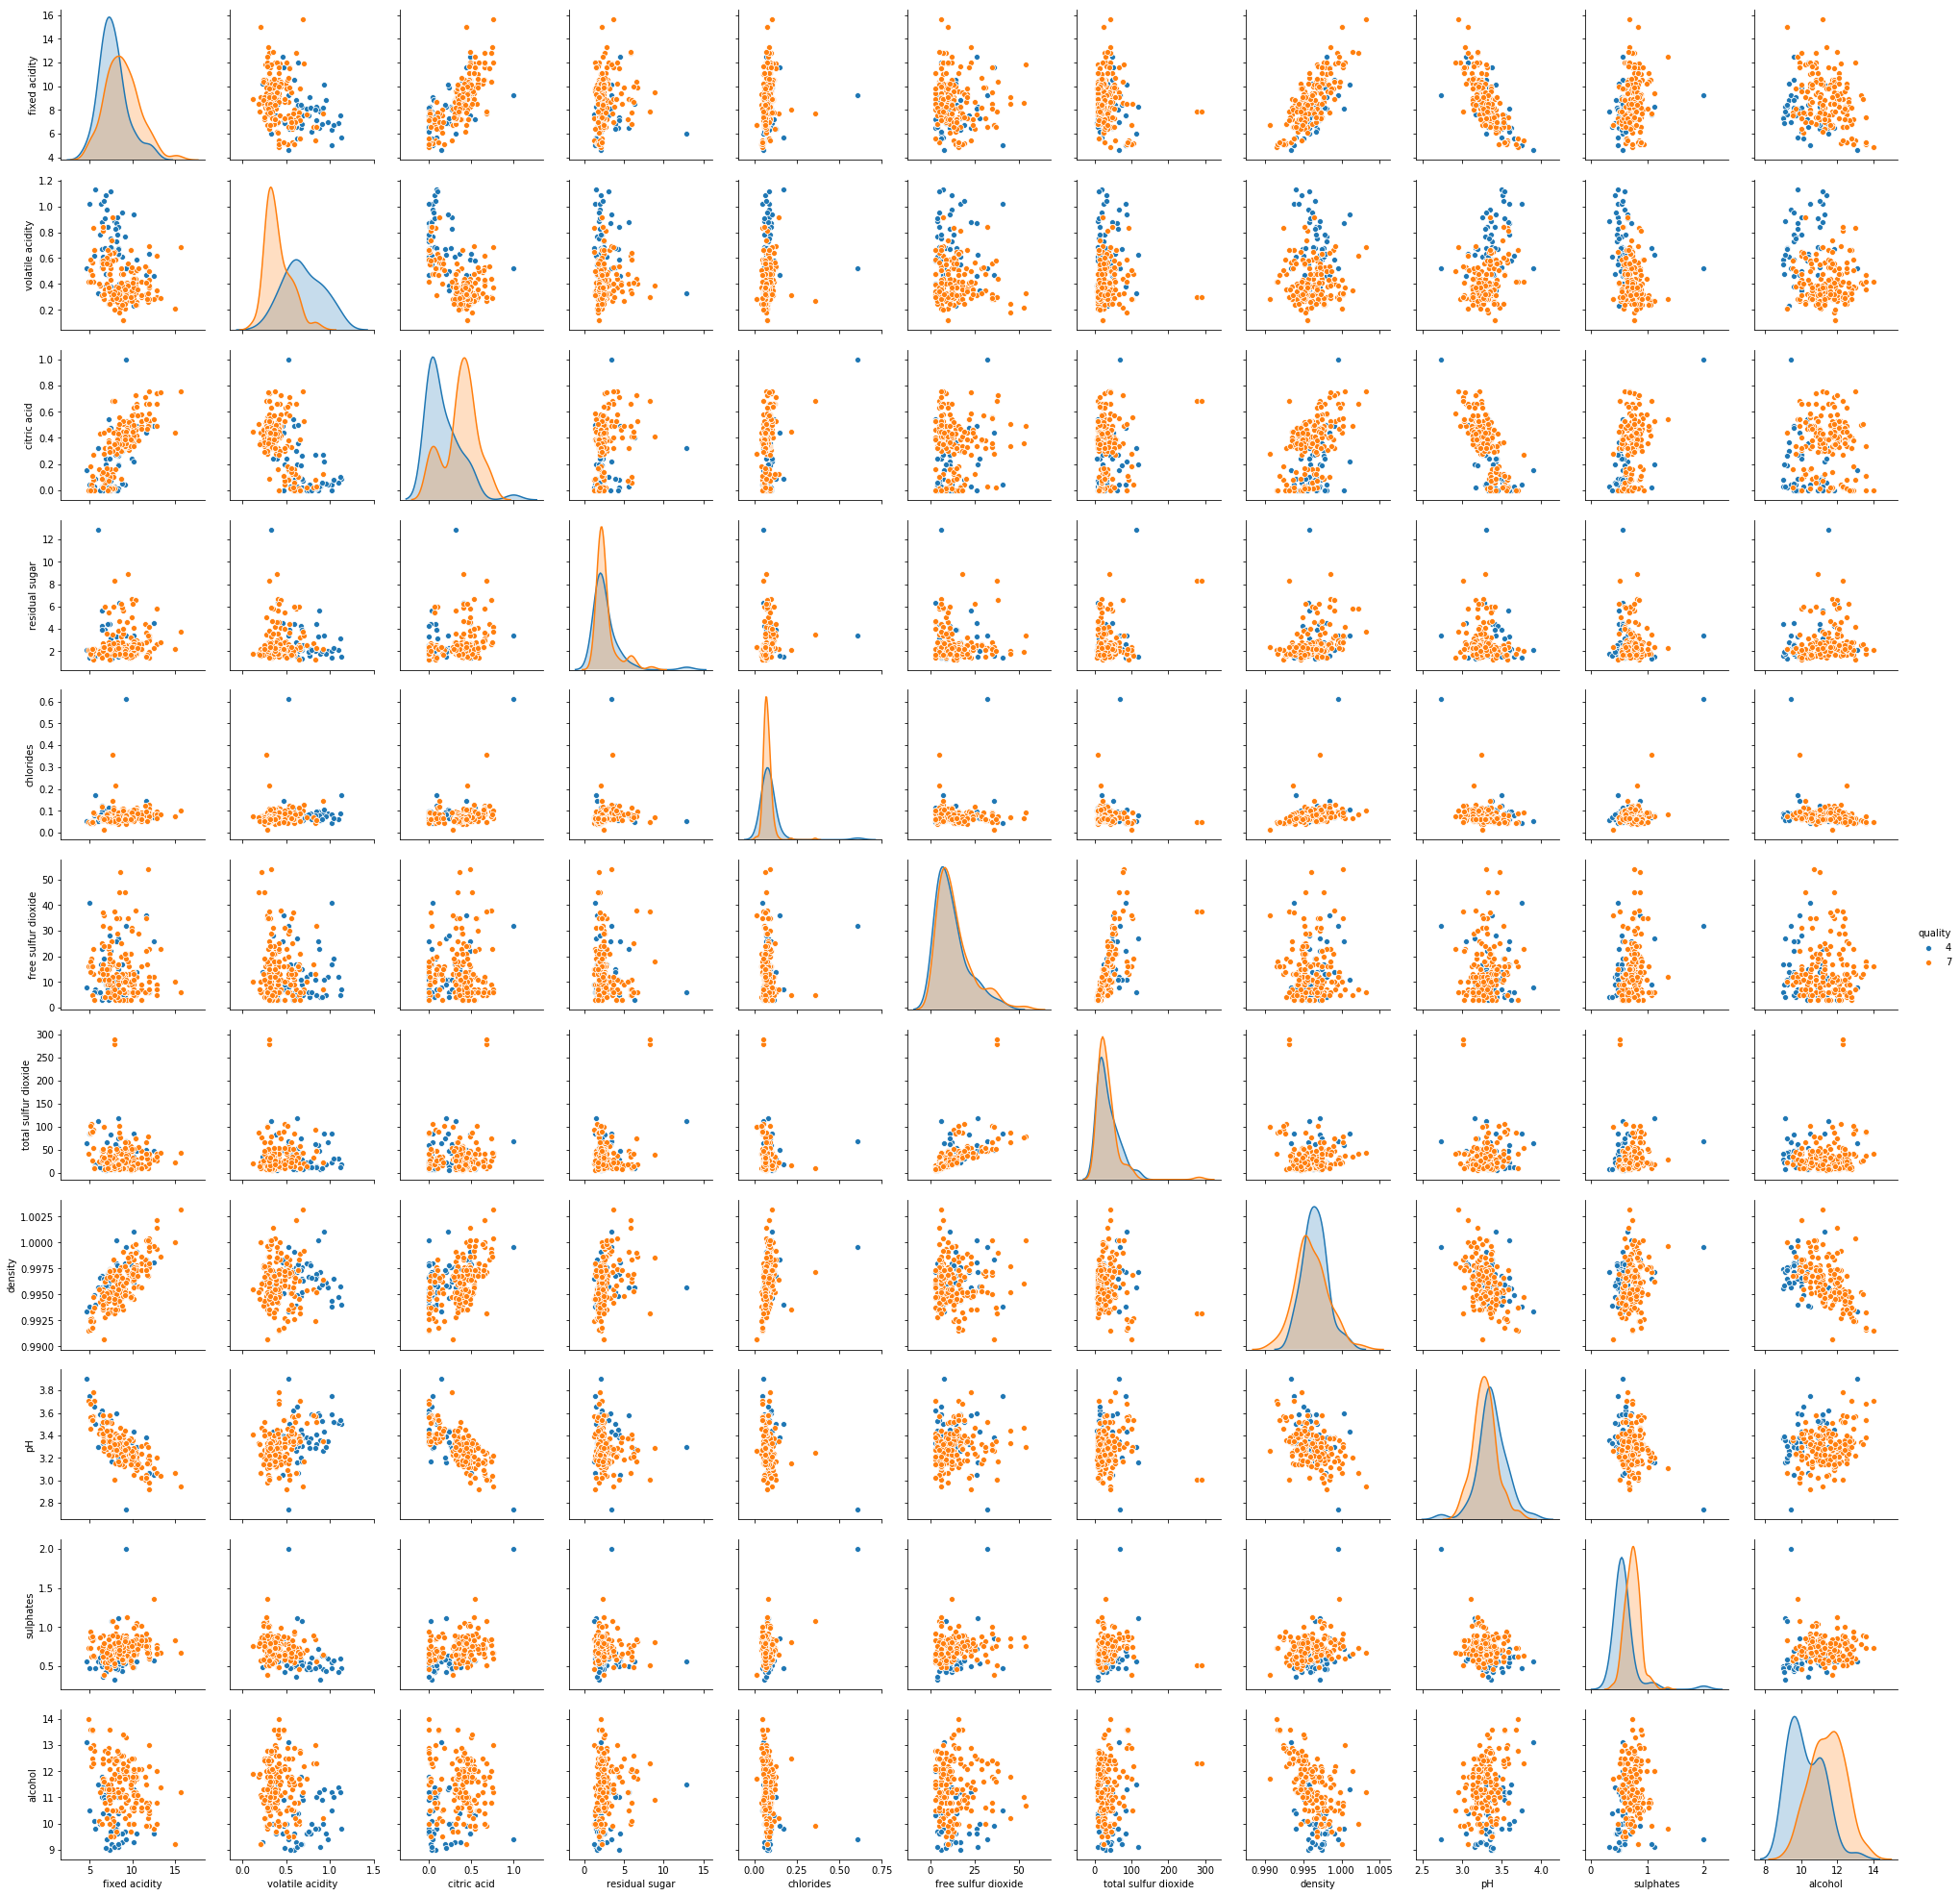

In [12]:
sns.pairplot(data_47,hue='quality',vars=data_47.columns[:11],diag_kind='kde')

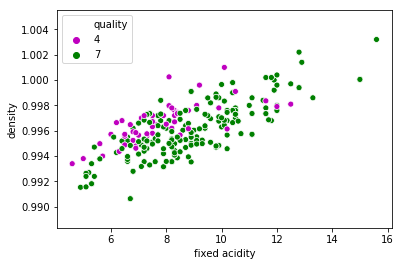

In [13]:
sns.scatterplot(x="fixed acidity", y="density", hue="quality", palette=["m", "g"], data=data_47)

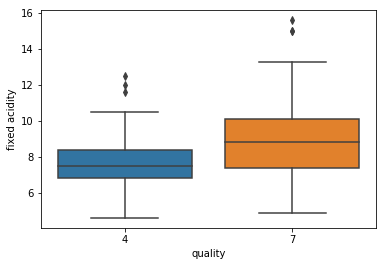

In [14]:
sns.boxplot(y="fixed acidity", x="quality",data=data_47)

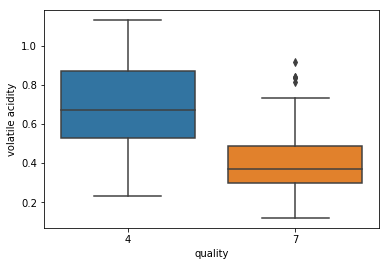

In [15]:
sns.boxplot(y="volatile acidity", x="quality",data=data_47)

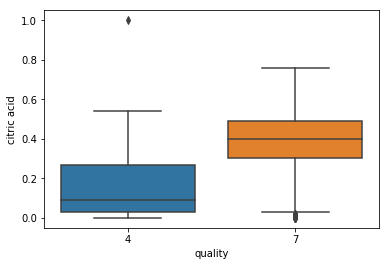

In [16]:
sns.boxplot(y="citric acid", x="quality",data=data_47)

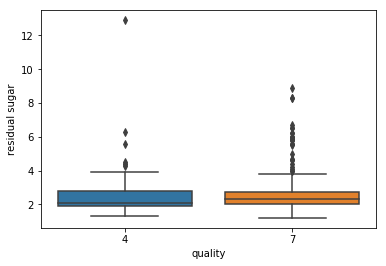

In [17]:
sns.boxplot(y="residual sugar", x="quality",data=data_47)

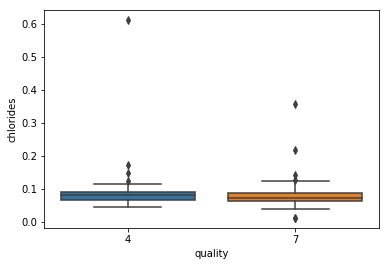

In [18]:
sns.boxplot(y="chlorides", x="quality",data=data_47)

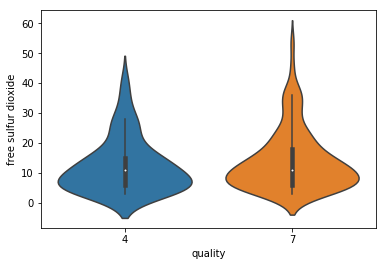

In [19]:
sns.violinplot(y="free sulfur dioxide", x="quality",data=data_47)

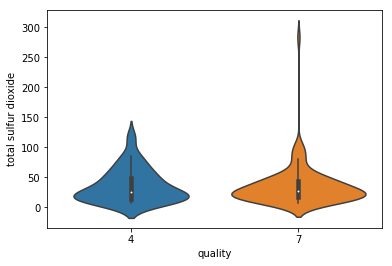

In [20]:
sns.violinplot(y="total sulfur dioxide", x="quality",data=data_47)

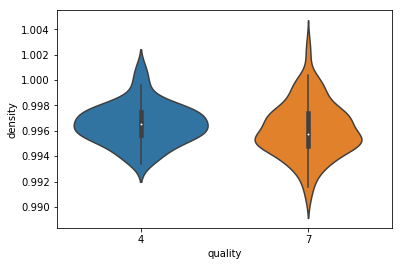

In [21]:
sns.violinplot(y="density", x="quality",data=data_47)

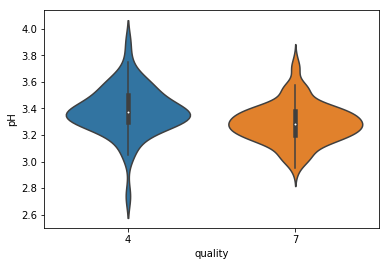

In [22]:
sns.violinplot(y="pH", x="quality",data=data_47)

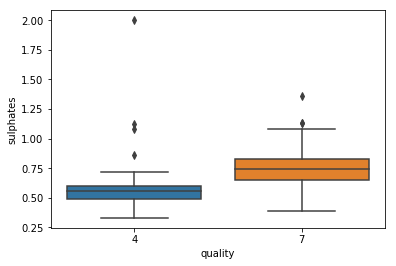

In [23]:
sns.boxplot(y="sulphates", x="quality",data=data_47)

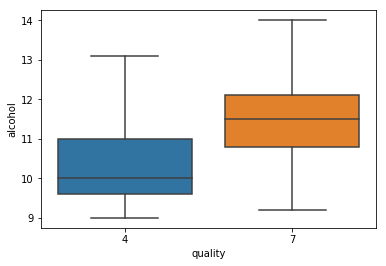

In [24]:
sns.boxplot(y="alcohol", x="quality",data=data_47)

## K Means

In [25]:
kmeans = KMeans(n_clusters=2,random_state=101)

In [26]:
kmeans.fit(data_47[data_47.columns[:11]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=101, tol=0.0001, verbose=0)

## Evaluation

In [27]:
kmeans.cluster_centers_

array([[  8.76026786e+00,   4.63191964e-01,   3.31964286e-01,
          2.64040179e+00,   7.92008929e-02,   1.18125000e+01,
          2.71071429e+01,   9.96292634e-01,   3.30633929e+00,
          7.03169643e-01,   1.11839286e+01],
       [  7.70000000e+00,   4.78750000e-01,   3.40357143e-01,
          3.31250000e+00,   8.23571429e-02,   2.85357143e+01,
          1.00642857e+02,   9.95426786e-01,   3.33785714e+00,
          7.71785714e-01,   1.14488095e+01]])

In [28]:
data_47['quality'].value_counts()

7    199
4     53
Name: quality, dtype: int64

In [29]:
data_47['cluster'] = data_47['quality'].apply(lambda x: int(x==4))

C:\Users\HasanTimucin\AppData\Local\conda\conda\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
data_47.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,8.642460,0.464921,0.332897,2.715079,0.079552,13.670635,35.277778,0.996196,3.309841,0.710794,11.213360,6.369048,0.210317
std,1.969545,0.201746,0.211972,1.465381,0.043820,9.953910,32.045446,0.002069,0.161141,0.172869,1.073033,1.225035,0.408345
min,4.600000,0.120000,0.000000,1.200000,0.012000,3.000000,7.000000,0.990640,2.740000,0.330000,9.000000,4.000000,0.000000
25%,7.200000,0.310000,0.117500,2.000000,0.062750,6.000000,16.000000,0.994932,3.210000,0.590000,10.500000,7.000000,0.000000
50%,8.400000,0.400000,0.370000,2.200000,0.074000,11.000000,27.000000,0.996090,3.305000,0.710000,11.200000,7.000000,0.000000
75%,9.900000,0.580000,0.480000,2.800000,0.088000,17.000000,44.000000,0.997365,3.400000,0.802500,12.000000,7.000000,0.000000
max,15.600000,1.130000,1.000000,12.900000,0.610000,54.000000,289.000000,1.003200,3.900000,2.000000,14.000000,7.000000,1.000000


In [31]:
from sklearn.metrics import classification_report,confusion_matrix

In [32]:
print(confusion_matrix(data_47['cluster'],kmeans.labels_))
print('\n')
print(classification_report(data_47['cluster'],kmeans.labels_))

[[179  20]
 [ 45   8]]


             precision    recall  f1-score   support

          0       0.80      0.90      0.85       199
          1       0.29      0.15      0.20        53

avg / total       0.69      0.74      0.71       252



In [33]:
cnames =['volatile acidity', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol', 'cluster']
data_t = data_47[cnames] 

In [34]:
kmeans = KMeans(n_clusters=2,random_state=101)
kmeans.fit(data_t[data_t.columns[:7]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=101, tol=0.0001, verbose=0)

In [35]:
print(confusion_matrix(data_47['cluster'],kmeans.labels_))
print('\n')
print(classification_report(data_47['cluster'],kmeans.labels_))

[[179  20]
 [ 43  10]]


             precision    recall  f1-score   support

          0       0.81      0.90      0.85       199
          1       0.33      0.19      0.24        53

avg / total       0.71      0.75      0.72       252

